In [55]:
import pandas as pd
data = pd.read_csv("C:\\Users\\35988\\Downloads\\qnmj55jovjm7w33g.csv")
data.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,optionid,index_flag,issuer,exercise_style
0,1996-01-04,1996-03-16,C,625000,9.1250,9.875,463,10177785,1,CBOE S&P 500 INDEX,E
1,1996-01-04,1996-03-16,C,580000,41.5000,42.500,136,10194353,1,CBOE S&P 500 INDEX,E
2,1996-01-04,1996-03-16,P,530000,0.4375,0.625,250,10146564,1,CBOE S&P 500 INDEX,E
3,1996-01-04,1996-02-17,P,625000,12.2500,13.000,1342,10055271,1,CBOE S&P 500 INDEX,E
4,1996-01-04,1996-03-16,P,525000,0.5000,0.625,100,10170877,1,CBOE S&P 500 INDEX,E


In [175]:
#Cleaning up the dataframe using only contracts that expire before the 27th of each month

data['date'] = pd.to_datetime(data['date'])
data['exdate'] = pd.to_datetime(data['exdate'])
data = data[data['exdate'].dt.day<27]

date
1996-01-04    0.187500
1996-01-05    0.312500
1996-01-08    0.500000
1996-01-09    0.505208
1996-01-10    0.433333
                ...   
2023-02-22    0.608247
2023-02-23    0.598457
2023-02-24    0.593647
2023-02-27    0.590801
2023-02-28    0.575287
Name: best_bid, Length: 6835, dtype: float64

In [177]:
def naive_strat(data):
    data = data[data['cp_flag']=='C']

    #data with index idx is the dataframe where we only consider the largest strikes for each trading date

    idx = data.groupby(['date','exdate'])['strike_price'].transform(max)==data['strike_price']
    data_idx = data[idx]

    #bid_series is the mean of the cross-section of the optin prices for each tradin date - 3 month moving avearge is self explanatory

    bid_series = data_idx.groupby('date')['best_bid'].mean()
    three_month_moving_avg = bid_series.rolling('90D').mean()

    return plt.plot(three_month_moving_avg)


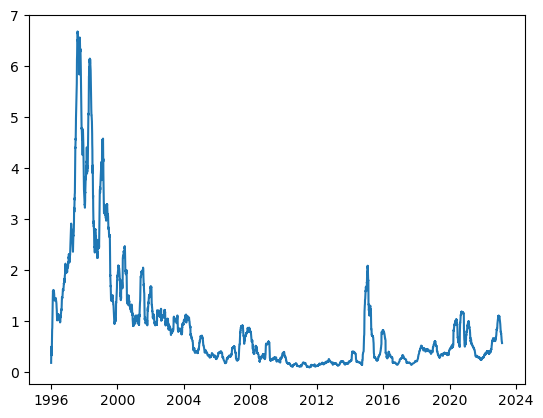

In [178]:
import matplotlib.pyplot as plt
naive_strat(data)